In [1]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.5)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

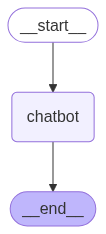

In [3]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


In [5]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "bye", "q"]:
        print("Goodbye!")
        break

    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print(f"Assistant: {value['messages'][-1].content}")
            print("-" * 20)

Assistant: Hello! How can I assist you today?
--------------------
Assistant: The average distance from the Earth to the Moon is about 384,400 kilometers (approximately 238,855 miles). This distance can vary slightly due to the Moon's elliptical orbit around the Earth.
--------------------
Assistant: The average distance from the Earth to the Moon is approximately 384,400 kilometers (about 238,855 miles). This distance can vary slightly due to the Moon's elliptical orbit around the Earth.
--------------------
Assistant: Paris is the capital city of France, known for its rich history, art, fashion, and culture. The city is famous for iconic landmarks such as the Eiffel Tower, the Louvre Museum, Notre-Dame Cathedral, and the Champs-Élysées. Paris is often referred to as "The City of Light" (La Ville Lumière) due to its historical significance as a center of education and ideas during the Age of Enlightenment. The city is also renowned for its cuisine, cafés, and vibrant neighborhoods lik

In [7]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [9]:
from tavily import TavilyClient
import os

client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

response = client.search(query="What is the Bitcoin price today?")
response

{'query': 'What is the Bitcoin price today?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://coinmarketcap.com/currencies/bitcoin/',
   'title': 'Bitcoin price today, BTC to USD live price, marketcap and chart',
   'content': 'The live Bitcoin price today is $113568.48 USD with a 24-hour trading volume of $65248768259.25 USD. We update our BTC to USD price in real-time.',
   'score': 0.9436445,
   'raw_content': None},
  {'url': 'https://www.kraken.com/prices/bitcoin',
   'title': 'Bitcoin price today - BTC price chart & live trends - Kraken',
   'content': "Bitcoin price today is $114,087.00. In the last 24 hours Bitcoin's price moved +0.08%. The current BTC to USD conversion rate is $114,087.00 per BTC.",
   'score': 0.94109917,
   'raw_content': None},
  {'url': 'https://www.coindesk.com/price/bitcoin',
   'title': 'Bitcoin (BTC) Price | BTC to USD Price and Live Chart - CoinDesk',
   'content': 'The price of Bitcoin (BTC) is $113584.61 t

In [10]:
for result in response['results']:
    print(f"Title: {result['title']}, UR:: {result['url']}")

Title: Bitcoin price today, BTC to USD live price, marketcap and chart, UR:: https://coinmarketcap.com/currencies/bitcoin/
Title: Bitcoin price today - BTC price chart & live trends - Kraken, UR:: https://www.kraken.com/prices/bitcoin
Title: Bitcoin (BTC) Price | BTC to USD Price and Live Chart - CoinDesk, UR:: https://www.coindesk.com/price/bitcoin
Title: BTC USD — Bitcoin Price and Chart - TradingView, UR:: https://www.tradingview.com/symbols/BTCUSD/
Title: Bitcoin Price, BTC Price, Live Charts, and Marketcap - Coinbase, UR:: https://www.coinbase.com/price/bitcoin


In [15]:
response = client.search(
    query="What are the best programming languages to learn this year?",
    search_depth="advanced",
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)

response

{'query': 'What are the best programming languages to learn this year?',
 'follow_up_questions': None,
 'answer': 'In 2025, Python is highly recommended for versatility, C++ for speed, and JavaScript for web development. Focus on languages that match your career goals and industry trends.',
 'images': ['https://infographicplaza.com/wp-content/uploads/top-10-programming-languages-infographic-plaza.jpg',
  'https://distantjob.com/wp-content/uploads/2022/01/Top-Programming-Languages-comparison-table.jpg',
  'https://cdn.ttgtmedia.com/rms/onlineImages/app_arch-top_languages-f_mobile.png',
  'https://i.pinimg.com/originals/10/73/3a/10733aa843404536ea74f5ad3923d742.png',
  'https://codinginfinite.com/wp-content/uploads/2019/10/Screenshot-2019-10-22-at-10.21.23-PM.png'],
 'results': [{'url': 'https://www.fullstackacademy.com/blog/nine-best-programming-languages-to-learn',
   'title': 'The 15 Best Programming Languages to Learn in 2025',
   'content': "With over 700 programming languages to ch

In [12]:
answer = client.qna_search(
    query="Who won the UEFA Champions League in 2024?",
)

print(answer)

Real Madrid won the 2024 UEFA Champions League final against Borussia Dortmund with a 2-0 victory. The decisive goals were scored by Dani Carvajal and Vinícius Júnior.


In [16]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = "What is the 'Reflection & Critique' pattern used in agentic applications and LangGraph?"

response = client.search(query, max_results=5, search_depth="advanced")["results"]
response

[{'url': 'https://www.analyticsvidhya.com/blog/2024/10/agentic-ai-reflection-pattern/',
  'title': 'What is Agentic AI Reflection Pattern?',
  'content': 'The Agentic AI Reflection Pattern is a method where the model generates, critiques, and refines its outputs through an iterative self-assessment process.\n This pattern enhances the accuracy and quality of AI-generated content by mimicking human-like feedback and revision loops.\n It is especially effective for large language models (LLMs), allowing them to catch mistakes, clarify ambiguities, and improve over multiple iterations. [...] The Reflection Pattern is an agentic AI design pattern applied to AI models, where the model generates an initial response to a prompt, evaluates this output for quality and correctness, and then refines the content based on its own feedback. The model essentially plays the dual roles of creator and critic. The process involves several iterations where the AI alternates between these two roles until t

In [18]:
prompt = [
    {
        'role': 'system',
        'content': f"""
        You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text."""
    },
    {
        'role': 'user',
        'content': f"""Information: '''{response}'''
        Using the above information, answer the following query: '''{query}''' in a detailed report"""
    }
]


lc_messages = convert_openai_messages(prompt)
print(lc_messages)

[SystemMessage(content='\n        You are an AI critical thinker research assistant.\n        Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Information: \'\'\'[{\'url\': \'https://www.analyticsvidhya.com/blog/2024/10/agentic-ai-reflection-pattern/\', \'title\': \'What is Agentic AI Reflection Pattern?\', \'content\': \'The Agentic AI Reflection Pattern is a method where the model generates, critiques, and refines its outputs through an iterative self-assessment process.\\n This pattern enhances the accuracy and quality of AI-generated content by mimicking human-like feedback and revision loops.\\n It is especially effective for large language models (LLMs), allowing them to catch mistakes, clarify ambiguities, and improve over multiple iterations. [...] The Reflection Pattern is an agentic AI design pattern applied to AI models, where the model generates an initial respons

In [19]:
response = ChatOpenAI(model_name="gpt-4o-mini").invoke(lc_messages)
print(response.content)

# Report on the 'Reflection & Critique' Pattern in Agentic Applications and LangGraph

## Introduction
The 'Reflection & Critique' pattern is a fundamental concept in the development of agentic AI applications, particularly in enhancing the capabilities of large language models (LLMs) through iterative self-assessment and refinement. This report explores the underlying principles of the reflection and critique pattern, its processes, applications, and its implementation in LangGraph.

## Definition of the Reflection & Critique Pattern
The Reflection & Critique pattern involves an agent (usually an AI system or model) generating initial outputs based on specific prompts, followed by a self-evaluation or critique of these outputs. This iterative process allows the agent to improve its responses over time, enhancing the overall quality and accuracy of the generated content. This dual-role mechanism—where the AI alternates between being a creator and a critic—creates a feedback loop that f

In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=3)

tools = [tool]

/var/folders/rg/_gpzq28d4m5bz9kt_j3vlkk00000gn/T/ipykernel_62826/3665934959.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=3)


In [21]:
response = tool.invoke("What is GPT o1")
response

[{'title': 'OpenAI o1 - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/OpenAI_o1',
  'content': 'OpenAI o1 is a reflective "Reflection (artificial intelligence)")generative pre-trained transformer (GPT). A preview of o1 was released by OpenAI on September 12, 2024. o1 spends time "thinking" before it answers, making it better at complex reasoning tasks, science and programming than GPT-4o.( The full version was released to ChatGPT users on December 5, 2024.(\n\nHistory\n-------\n\n[edit]\n\n### Background\n\n[edit] [...] Limitations\n-----------\n\n[edit]\n\no1 usually requires more computing time and power than other GPT models by OpenAI, because it generates long chains of thought before making the final response.(\n\nAccording to OpenAI, o1 may "fake alignment", that is, generate a response that is contrary to accuracy and its own chain of thought, in about 0.38% of cases.( [...] o1-preview\'s API is several times more expensive than GPT-4o.( As of January 2025, API usage for t

In [ ]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)

graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

from IPython

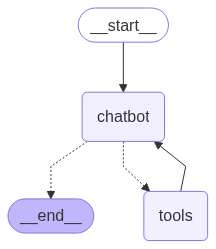

In [27]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "bye", "q"]:
        print("Goodbye!")
        break

    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print(f"Assistant: {value['messages'][-1].content}")
        
        
        print("-" * 50)

Assistant: 
--------------------------------------------------
Assistant: [{"title": "Pan Zhanle BLAZES to 100m freestyle gold with world-record swim", "url": "https://www.youtube.com/watch?v=N60Le7TFgMI", "content": "# Pan Zhanle BLAZES to 100m freestyle gold with world-record swim | Paris Olympics | NBC Sports\n\nNBC Sports\n9519 likes\n847965 views\n1 Aug 2024\nPan Zhanle scorched the field on his way to breaking his own world record in the men's 100m freestyle and easily winning gold at the Paris Olympics. #NBCSports #Olympics #Paris2024 \n» Subscribe to NBC Sports: \n» Live Olympic coverage on NBCOlympics.com:", "score": 0.86441374}, {"title": "Swimming at the 2024 Summer Olympics – Men's 100- ...", "url": "https://en.wikipedia.org/wiki/Swimming_at_the_2024_Summer_Olympics_%E2%80%93_Men%27s_100-metre_freestyle", "content": "19. ^ Wade, Stephen (31 July 2024). \"Pan Zhanle of China breaks own world record to win Olympic gold medal in men's 100-meter freestyle\". Associated Press. A

In [30]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)

graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

In [50]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver ### fix

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver()) ### fix


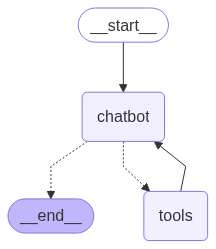

In [51]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [52]:
config = {'configurable': {'thread_id': '1'}}
prompt = "Hi! My name is Andrei and you are a math tutor."

events = graph.stream(
    {"messages": [("user", prompt)]}, config, stream_mode="values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi! My name is Andrei and you are a math tutor.
================================== Ai Message ==================================

Hi Andrei! I'm here to help you with math. What specific topics or questions do you have in mind?


In [53]:
prompt = "What is my name and what is your role?"

events = graph.stream(
    {"messages": [("user", prompt)]}, config, stream_mode="values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name and what is your role?
================================== Ai Message ==================================

Your name is Andrei, and my role is to be your math tutor. How can I assist you with math today?


In [55]:
config1 = {'configurable': {'thread_id': '2'}}


prompt = "What is my name and what is your role?"

events = graph.stream(
    {"messages": [("user", prompt)]}, config1, stream_mode="values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name and what is your role?
================================== Ai Message ==================================

I don't have access to personal data about individuals unless it has been shared with me in the course of our conversation. Therefore, I don't know your name. My role is to assist you by providing information and answering questions to the best of my ability. How can I help you today?


In [57]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi! My name is Andrei and you are a math tutor.', additional_kwargs={}, response_metadata={}, id='4be30907-a789-416f-bc0a-bde5222d8b73'), AIMessage(content="Hi Andrei! I'm here to help you with math. What specific topics or questions do you have in mind?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 93, 'total_tokens': 117, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C7IQWr2NGA1X2frlFyvUqEiAHmSoz', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0e0239e2-bf4d-4e6a-8adb-f5c84f5a4310-0', usage_metadata={'input_tokens': 93, 'output_tokens': 24, 'total_tokens': 117, 'input_token_de

In [58]:
snapshot.next

()